#**WALMART INC.**

**INTRODUCTION**

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States and 23 other countries. Walmart has 10,586 stores and clubs in 24 countries, operating under 46 different names. Walmart is the world's largest company by revenue, according to the Fortune Global 500 list in October 2022. Walmart is also the largest private employer in the world, with 2.1 million employees.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094

--2026-02-02 07:40:36--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.225.41.124, 13.225.41.5, 13.225.41.18, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.225.41.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data.csv?1641285094.2’

walmart_data.csv?16 100%[===================>]  21.96M   130MB/s    in 0.2s    

2026-02-02 07:40:36 (130 MB/s) - ‘walmart_data.csv?1641285094.2’ saved [23027994/23027994]



In [9]:
df = pd.read_csv('/content/walmart_data.csv?1641285094.1')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# **DATA DESCRIPTION**

**DATA TYPES:**

The data type of each series in the dataset is determined below. "int64" resembles numerical variables in the dataframe whereas "object" denotes categorical variables or string data.

In [10]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


**SHAPE OF DATA:**

The shape of the data is 550068 rows and 10 columns, determined below.

In [11]:
df.shape

(550068, 10)

**DATA INFO:**

The dataset consists of 550068 customer records with 10 attributes each, all of which are complete (no missing data).
It includes both categorical and numerical variables, suitable for mixed-type analysis.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**DATA COUNT:**

The unique count of values under each attribute in the data is determined below.

In [13]:
for i in df.columns:
  print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


#**DATA DISTRIBUTION**

This dataset shows the average purchase amount is approximately ₹9,264 with a wide range, indicating a diverse customer base in terms of spending power. The distribution is right-skewed, suggesting a few high-value transactions influence the mean. Most purchases fall within mid-range product categories (5 to 15), and the customer base includes a balanced spread across 21 occupation types. Around 60% of customers are single, providing an opportunity for Walmart to design personalized marketing campaigns based on marital status and spending patterns.

In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**DATA DISTRIBUTION (INCLUDES ONLY OBJECT):**

The categorical summary reveals that most Walmart customers are male, aged 26–35, and reside in city category B. The most frequently purchased product appears over 1,900 times, indicating strong product-level preferences. Most customers have been living in their current city for only a year, hinting at a young, mobile customer base. These insights can help Walmart tailor product offerings, regional strategies, and customer engagement campaigns more effectively.

In [15]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


**DATA DISTRIBUTION (INCLUDES ALL DATA TYPES):**

The below table helps to understand that Walmart's customer base consists largely of young, single males, with semi-urban representation (City B). Product sales are concentrated around a few popular items, and spending behavior is widely distributed. Most customers have lived in their current city for a short period, suggesting Walmart could benefit from targeting mobile professionals with personalized campaigns, relocation bundles, and loyalty incentives.

In [16]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


**DUPLICATE ENTRIES:**

This data contains no duplicate entries.

In [17]:
df.duplicated().sum()

np.int64(0)

**NULL ENTRIES:**

There are no null entries in this dataset.

In [18]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


# **OUTLIER DETECTION:**

**OUTLIERS IN USER_ID:**

The analysis detected 0 outliers in the User_ID column based on the IQR method, confirming that user identifiers are uniformly distributed without anomalies.

In [19]:
Q1 = df['User_ID'].quantile(0.25)
Q3 = df['User_ID'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_userid = df[(df['User_ID'] < lower) | (df['User_ID'] > upper)]
print(f"Outliers in User_ID: {len(outliers_userid)} rows")
outliers_userid[['User_ID','Age', 'Product_Category', 'Gender']]

Outliers in User_ID: 0 rows


,User_ID,Age,Product_Category,Gender


**OUTLIERS IN OCCUPATION:**

The IQR analysis of User_ID revealed no outliers, confirming that user identifiers are sequential and uniformly distributed. This indicates the column is suitable for grouping customers without data quality concerns.

In [20]:
Q1 = df['Occupation'].quantile(0.25)
Q3 = df['Occupation'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_occ = df[(df['Occupation'] < lower) | (df['Occupation'] > upper)]
print(f"Outliers in Occupation: {len(outliers_occ)} rows")
outliers_userid[['User_ID','Occupation', 'Product_Category', 'Gender']]

Outliers in Occupation: 0 rows


,User_ID,Occupation,Product_Category,Gender


**OUTLIERS IN MARITAL STATUS:**

The IQR method found no outliers in the Marital_Status column, as it contains only binary values (0 = Single, 1 = Married). This confirms that the data for marital status is clean, consistent, and suitable for categorical analysis.

In [21]:
Q1 = df['Marital_Status'].quantile(0.25)
Q3 = df['Marital_Status'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_ms = df[(df['Marital_Status'] < lower) | (df['Marital_Status'] > upper)]
print(f"Outliers in Marital_Status: {len(outliers_ms)} rows")
outliers_ms[['User_ID','Marital_Status', 'Product_Category', 'Gender']]

Outliers in Marital_Status: 0 rows


,User_ID,Marital_Status,Product_Category,Gender


**OUTLIERS IN PRODUCT CATEGORY:**

The IQR analysis identified several outliers in the Product_Category column, indicating that some products fall far outside the typical range. These outliers may represent either very niche or extremely popular product categories, useful for focused marketing or inventory planning.

In [22]:
Q1 = df['Product_Category'].quantile(0.25)
Q3 = df['Product_Category'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_prod_cat = df[(df['Product_Category'] < lower) | (df['Product_Category'] > upper)]
print(f"Outliers in Product_Category: {len(outliers_prod_cat)} rows")
outliers_prod_cat[['User_ID','Marital_Status', 'Product_Category', 'Gender']]

Outliers in Product_Category: 4153 rows


,User_ID,Marital_Status,Product_Category,Gender
545915,1000001,0,20,F
545916,1000002,0,20,M
545917,1000004,1,20,M
545918,1000006,0,20,F
545919,1000007,1,20,M
...,...,...,...,...
550063,1006033,1,20,M
550064,1006035,0,20,F
550065,1006036,1,20,F
550066,1006038,0,20,F


**OUTLIERS IN PURCHASES:**

The IQR analysis for Purchase revealed a significant number of outliers, indicating high variability in customer spending. These outliers may represent bulk buyers or premium product purchases, which are valuable for customer segmentation and targeted promotions.

In [23]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers_purc = df[(df['Purchase'] < lower) | (df['Purchase'] > upper)]
print(f"Outliers in Purchase: {len(outliers_purc)} rows")
outliers_purc[['User_ID','Marital_Status', 'Product_Category', 'Purchase']]

Outliers in Purchase: 2677 rows


,User_ID,Marital_Status,Product_Category,Purchase
343,1000058,0,10,23603
375,1000062,0,10,23792
652,1000126,0,10,23233
736,1000139,0,10,23595
1041,1000175,0,10,23341
...,...,...,...,...
544488,1005815,0,10,23753
544704,1005847,0,10,23724
544743,1005852,1,10,23529
545663,1006002,1,10,23663


**BOXPLOTS DEMONSTRATING OUTLIERS TOGETHER ACROSS THE DATA:**

The boxplots of continuous variables reveal varying levels of dispersion and the presence of outliers, particularly in the Purchase column, which shows a wide range and several high-value outliers. Columns like Occupation and Marital_Status exhibit more compact distributions with minimal or no outliers, indicating consistent categorical-like behavior despite being numeric. This suggests that while most numeric fields are well-bounded, customer spending (Purchase) is highly variable and may benefit from further segmentation or normalization.

In [24]:
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns
print("Continuous Variables:", continuous_vars)

Continuous Variables: Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


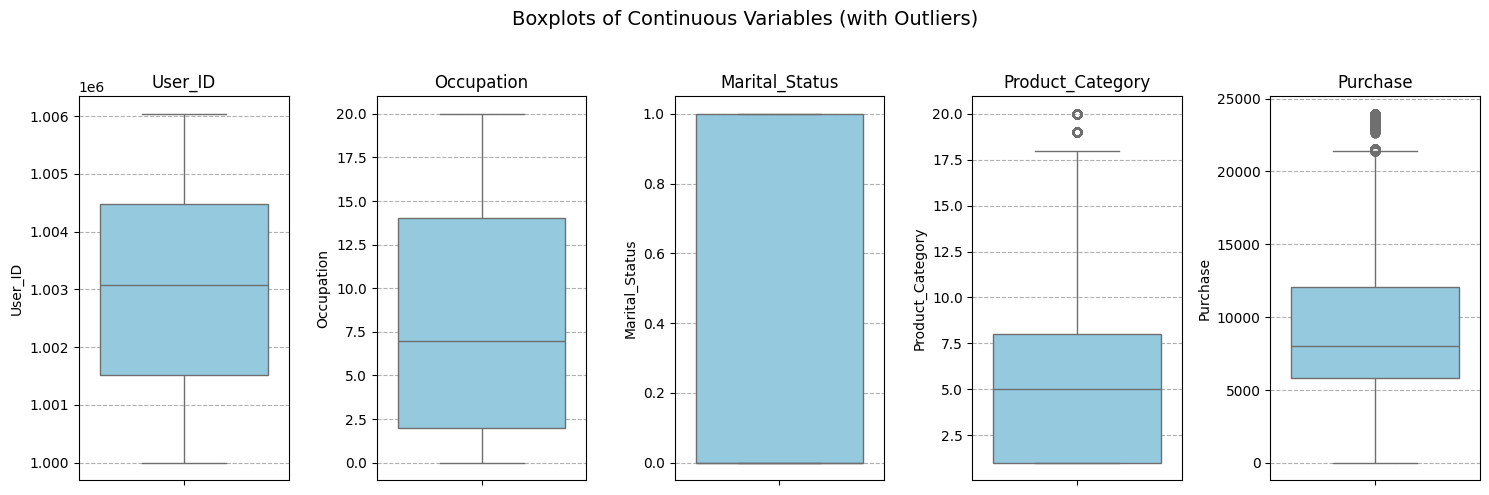

In [25]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_vars):
    plt.subplot(1, len(continuous_vars), i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.grid(axis='y', linestyle='--')
plt.suptitle('Boxplots of Continuous Variables (with Outliers)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**BOXPLOTS AFTER CLIPPING THE EXTREME VALUES:**

The visualization below shows boxplots of continuous variables after clipping between the 5th and 95th percentiles across the dataset, effectively reducing the influence of extreme outliers. Compared to the original data, the distributions now appear more compact and symmetric, especially for the Purchase column, enhancing the readability and stability of the data for downstream analysis or modeling. This technique preserves most data variability while minimizing distortion from extreme values.

In [26]:
df_clip = df.copy()
for col in continuous_vars:
    lower = df_clip[col].quantile(0.05)
    upper = df_clip[col].quantile(0.95)
    df_clip[col] = np.clip(df_clip[col],lower,upper)

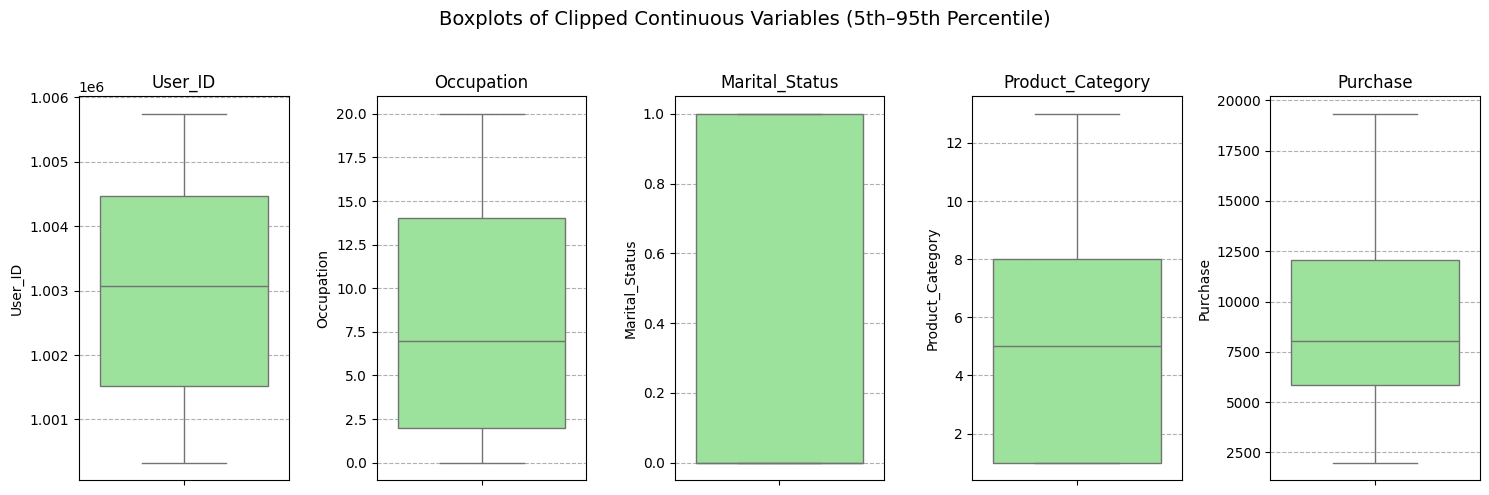

In [27]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_vars):
    plt.subplot(1, len(continuous_vars), i+1)
    sns.boxplot(y=df_clip[col], color='lightgreen')
    plt.title(col)
    plt.grid(axis='y', linestyle='--')
plt.suptitle('Boxplots of Clipped Continuous Variables (5th–95th Percentile)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#**DATA ANALYSIS AND VISUALIZATION**

**DISTRIBUTION OF PURCHASE**

The histogram KDE plot below shows the distribution of purchases made by the customer throughout the dataset.

**INSIGHTS:**

The histogram with KDE overlay shows that most purchases are concentrated in the ₹5,000–₹10,000 range, with a sharp peak near the center and a right-skewed distribution. This skew indicates that while a majority of transactions are of moderate value, a smaller number of customers make high-value purchases, pushing the tail to the right.

**RECOMMENDATIONS:**

Walmart can target high-value customers with personalized offers and premium product recommendations, while also focusing on increasing the average basket size for typical buyers through bundled deals or cross-selling strategies. Understanding this distribution helps tailor pricing, promotions, and inventory stocking more efficiently.

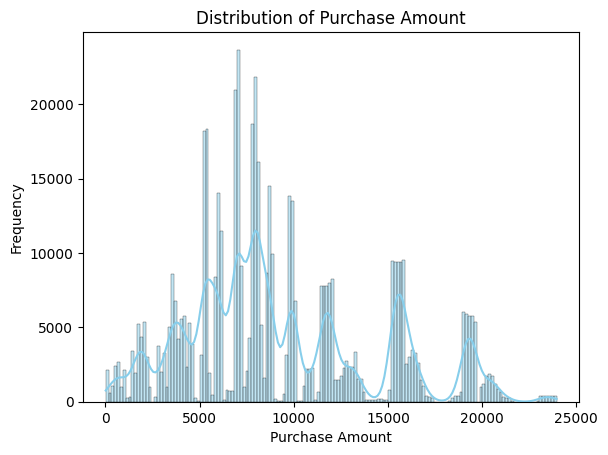

In [28]:
sns.histplot(df['Purchase'], kde=True, color='skyblue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

**DISTRIBUTION OF CUSTOMERS BY AGE GROUP**

The countplot below shows the distribution of customers by their age groups throughout the dataset.

**INSIGHTS:**

The countplot reveals that the 26–35 age group is the largest customer segment, followed by the 18–25 and 36–45 groups. The young to middle-aged population (18–45) dominates the customer base, while the 0–17 and 55+ groups have the fewest shoppers.

**RECOMMENDATIONS:**

Walmart should focus marketing efforts and product offerings on the 18–45 demographic, tailoring promotions, product categories (like electronics, fashion, and lifestyle), and communication channels to their preferences. At the same time, the smaller segments (like 55+) could be engaged with targeted campaigns (e.g., health products, senior discounts) to diversify and grow their participation.

In [ ]:
sns.countplot(x='Age', data=df, order=df['Age'].value_counts().index, palette='Set2')
plt.title('Customer Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**DISTRIBUTION OF PURCHASE BY GENDER**

The boxplot below shows the distribution of purchases made by customers based on their gender throughout the data.

**INSIGHTS:**

The boxplot shows that male customers consistently spend more per transaction than female customers. The median purchase amount is higher for males, and the interquartile range (IQR) is also slightly wider, indicating greater variability in male spending. Additionally, both genders show the presence of outliers — some customers make significantly higher purchases.

**RECOMMENDATIONS:**

Walmart can leverage the higher spending tendency of male customers by promoting premium or upsell products through male-targeted campaigns. Meanwhile, female customers may respond better to bundled offers or personalized promotions aimed at increasing average spend. A gender-sensitive strategy can improve customer engagement and maximize revenue potential.

In [ ]:
sns.boxplot(x='Gender', y='Purchase', data=df, palette='pastel')
plt.title('Purchase Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

**DISTRIBUTION OF PURCHASE BY AGE GROUP AND GENDER**

The distribution of purchases made by customers based on their age group and gender is presented below with the help of a boxplot.

**INSIGHTS:**

The boxplot illustrates that males tend to spend more than females across all age groups, with the 26–35 and 36–45 age groups showing the highest median purchase values for both genders. Spending patterns are relatively consistent, but males show greater variability and higher outliers, suggesting potential for premium purchases.

**RECOMMENDATIONS:**

Walmart should focus marketing and product strategies on the 26–45 male demographic, promoting higher-value items and personalized offers. Simultaneously, they can boost spending among female customers through bundled deals, targeted discounts, and loyalty programs, especially in the high-engagement age ranges.

In [ ]:
sns.boxplot(x='Age', y='Purchase', hue='Gender', data=df, palette='Set3')
plt.title('Purchase Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.legend(title='Gender',loc='lower right', title_fontsize=10,fontsize=8)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**DISTRIBUTION OF PAIR-WISE RELATIONSHIP BETWEEN SELECTED FEATURES FROM THE DATA**

The pairplot below helps to understand the pair-wise relationship among selected features from the dataset to draw valuable insights for the business.

**INSIGHTS:**

The pairplot reveals that purchase amounts are right-skewed, with most customers spending moderately and a few making high-value purchases. Occupation appears uniformly distributed, indicating a diverse customer base, while Product_Category shows distinct peaks, suggesting that certain categories are more popular. However, there is no clear linear relationship between these variables and purchase amount, implying that spending behavior is not strongly influenced by occupation or product category alone.

**RECOMMENDATIONS:**

Walmart should explore categorical variables and behavioral factors (like age, gender, or city) for deeper insights into spending patterns. Relying on numeric features alone may not yield accurate predictions; incorporating segmentation or predictive modeling can enhance marketing and sales strategies.

In [ ]:
numeric_cols = ['Purchase', 'Occupation', 'Product_Category']
sns.pairplot(df[numeric_cols], corner=True, diag_kind='kde', palette='husl')
plt.suptitle('Pair-wise Relationship Among Selected Features', y=1.02)
plt.show()

**CORRELATION DISTRIBUTION BETWEEN NUMERICAL VARIABLES FROM THE DATA**

The heatmap below helps in understanding the correlation between the numerical variables within the dataset.

**INSIGHTS:**

The correlation heatmap shows that the numerical variables in the dataset have weak or no strong linear relationships with each other. The Purchase variable has very low correlation values with both Occupation and Product_Category, suggesting that these features do not linearly influence purchase amounts. Additionally, the lack of strong correlations across the board indicates that no single numeric variable can reliably predict purchasing behavior.

**RECOMMENDATIONS:**

Walmart should not rely solely on numerical features like Occupation or Product_Category to drive marketing or personalization strategies. Instead, combining these with categorical features (e.g., Age, Gender, City Category) and using advanced modeling techniques like decision trees or clustering may provide more accurate insights into customer behavior.

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


**AVERAGE PRODUCT PURCHASES BASED ON PRODUCT CATEGORY:**

The average purchase amount with respect to each product category is represented below with the help of a barplot.

**INSIGHTS:**

1. Certain product categories(eg: Category 10, 7 and 6) show notably higher average purchases. These categories likely include premium or high-value products, suggesting they appeal to customers willing to spend more.
2. Categories like 12, 13 and 20 may reflect lower average purchases, indicating either lower-value products or budget-focused purchases.

**RECOMMENDATIONS:**

1. Invest in marketing and bundling for categories with high average purchases, as they offer higher revenue per transaction. Upselling or cross-selling in these categories could further boost revenue.
2. For categories with low average purchases, evaluate if they can be bundled with higher-value items, offered with discounts to increase volume or streamlined to reduce inventory costs.

In [ ]:
purchase = df.groupby('Product_Category')['Purchase'].mean().reset_index()
purchase

In [ ]:
sns.barplot(x=purchase['Product_Category'],y=purchase['Purchase'],color='lightcoral')
plt.title('Average Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.show()

**50M PROJECTED PURCHASE V/S AVERAGE PURCHASE PER TRANSACTION MADE BY CUSTOMERS BASED ON THEIR GENDER**

The bar plots below show a comparison of customer purchase behavior given 2 scenarios. The left plot shows average spending per transaction by gender whereas the right plot scales that va;ue to 50 million hypothetical transactions per gender.

**INSIGHTS:**

1. Males spend more per transaction (₹9,438) than females (₹8,735) on average.
2. When scaled to 50 million transactions, males would spend approximately ₹471.88 billion whereas females would spend approximately ₹436.73 billion.

**RECOMMENDATIONS:**

1. Male customers represent a slightly higher revenue opportunity per transaction. Walmart can promote premium products, tech, and bundled offers to this segment.
2. Female customers, being slightly lower in per-transaction spend, may still account for high volume. Walmart should focus on increasing basket size using cross-selling or personalized deals.

In [ ]:
gender_avg = df.groupby('Gender')['Purchase'].mean().reset_index()
gender_avg.columns = ['Gender', 'Avg_Purchase_Per_Transaction']
gender_avg

In [ ]:
gender_avg['Total_Expense_for_50M_Transactions'] = gender_avg['Avg_Purchase_Per_Transaction'] * 50000000
gender_avg

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Gender', y='Avg_Purchase_Per_Transaction', data=gender_avg, palette='pastel')
plt.title('Average Purchase per Transaction by Gender')
plt.ylabel('Average Purchase')
plt.xlabel('Gender')
for index, row in gender_avg.iterrows():
    plt.text(index, row['Avg_Purchase_Per_Transaction'] + 100, f"₹{row['Avg_Purchase_Per_Transaction']:.0f}",
             ha='center', fontsize=12)

plt.subplot(1, 2, 2)
sns.barplot(x='Gender', y='Total_Expense_for_50M_Transactions', data=gender_avg, palette='Set2')
plt.title('Projected Total Spend for 50M Transactions')
plt.ylabel('Total Spend')
plt.xlabel('Gender')
for index, row in gender_avg.iterrows():
  total_spend_billion = row['Total_Expense_for_50M_Transactions'] / 1e9
  plt.text(index, row['Total_Expense_for_50M_Transactions'] + 1e9,
             f"₹{total_spend_billion:.2f}B", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

**AVERAGE PURCHASE AMOUNT PER TRANSACTION BY GENDER**

The pointplot with error bars below helps in understanding the average purchase amount per transaction based on customer gender with respect to confidence interval level- 95%.  The error bars represent the variability in the data i.e they show how much the data could reasonably vary around a central value like mean.

**INSIGHTS:**

1. Males spend more per transaction (9,437.53) compared to females (8,734.57). This is a approximately a difference of 700, which is consistent and statistically backed.
2. The 95% confidence interval for males is (9,422.02 – 9,453.03) and for females, it's (8,709.21 – 8,759.92). Since these intervals do not overlap, we have strong evidence that male customers spend significantly more than female customers on average.

**RECOMMENDATIONS:**

1. Target males with premium products, upsells, and bundled offers since they are likely to spend more per transaction.
2. Encourage female spending by offering value-based promotions, loyalty rewards, and cross-category discounts to increase basket size.

In [ ]:
def compute_ci(series, confidence=0.95):
    n = len(series)
    mean = np.mean(series)
    std = np.std(series, ddof=1)
    z = stats.norm.ppf((1 + confidence) / 2)
    margin = z * (std / np.sqrt(n))
    lower = mean - margin
    upper = mean + margin
    return mean, lower, upper

In [ ]:
female_purchases = df[df['Gender'] == 'F']['Purchase']
male_purchases = df[df['Gender'] == 'M']['Purchase']

# Compute confidence intervals
f_mean, f_lower, f_upper = compute_ci(female_purchases)
m_mean, m_lower, m_upper = compute_ci(male_purchases)

# Show results
print(f"Female Mean: ₹{f_mean:.2f} | 95% CI: (₹{f_lower:.2f}, ₹{f_upper:.2f})")
print(f"Male Mean: ₹{m_mean:.2f} | 95% CI: (₹{m_lower:.2f}, ₹{m_upper:.2f})")

In [ ]:
ci_data = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'Mean': [f_mean, m_mean],
    'Lower': [f_lower, m_lower],
    'Upper': [f_upper, m_upper]})
ci_data['Error'] = ci_data['Upper'] - ci_data['Mean']

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7, 5))
plt.errorbar(x=ci_data['Gender'], y=ci_data['Mean'], yerr=ci_data['Error'],
             fmt='o', capsize=10,color='teal', markersize=8,
             ecolor='black',elinewidth=2)
for index, row in ci_data.iterrows():
    plt.text(index, row['Mean'] + 20, f"₹{row['Mean']:.0f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Average Purchase by Gender\n(With 95% Confidence Intervals)',
          fontsize=14, weight='bold')
plt.xlabel('Gender')
plt.ylabel('Average Purchase (₹)')
plt.tight_layout()
plt.show()

**TOTAL PURCHASES BASED ON AGE GROUPS OF CUSTOMERS**

The lineplot below depicts the trend of total purchases made by customers according to each of their age groups. The age groups are divided as follows: (0-17), (18-25), (26-35), (36-45), (46-50), (51-55) and (55+).

**INSIGHTS:**

1. The 26–35 age group clearly contributes the highest total purchase amount, followed by 36–45 and 18–25.
2. The youngest (0–17) and oldest (55+) groups show the lowest total purchases, likely due to financial dependence (younger) or lower frequency (older).
3. The trend highlights a strong spending core in the working-age population (18–45).

**RECOMMENDATIONS:**

1. The age groups are high-engagement, high-value customers, so Walmart should prioritize them for new launches, seasonal deals, and membership perks.
2. For youth (0–17): Introduce family bundles, school/college-targeted offers, or parent-influenced purchasing strategies.
3. For seniors (55+): Highlight convenience, wellness, and trusted value, using accessible marketing and delivery support.

In [ ]:
age = df.groupby('Age')['Purchase'].sum()
age

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x=age.index,y=age.values,color='lightgreen')
for i, value in enumerate(age.values):
    plt.text(i, value + 1e6, f'₹{value:,.0f}', ha='center', va='bottom', fontsize=9)
plt.title('Total Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.show()

**TOTAL PURCHASES BASED ON CUSTOMER GENDER**

The barplot below depicts the total purchases made by customers based on their gender for better understanding of customer purchase behavior depending on their gender.

**INSIGHTS:**

1. The bar plot clearly shows that males have a significantly higher total purchase amount compared to females.
2. This indicates that either the male customer base is larger or they are making more frequent or higher-value purchases overall.

**RECOMMENDATIONS:**

1. Walmart can analyze male shopper segments further to identify which products are contributing to this total spend.
2. Opportunities to increase engagement and value among female customers (e.g., targeted promotions, bundles, or loyalty rewards) can be explored.
3. This insight supports the case for gender-specific marketing and product strategies to optimize performance and revenue.

In [ ]:
gen = df.groupby('Gender')['Purchase'].sum()
gen

In [ ]:
sns.barplot(x=gen.index,y=gen.values,color='yellow')
for i, value in enumerate(gen.values):
    plt.text(i, value + 1e6, f'₹{value:,.0f}', ha='center', va='bottom', fontsize=12)

plt.title('Total Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.show()

**AVERAGE PURCHASES BASED ON CUSTOMER GENDER**

The bar plot below visualizes the average purchase amount by gender, revealing how spending behavior varies between males and females.

1. Males have a higher average purchase amount than females. This suggests that either males are buying more expensive items or making larger transactions per purchase.
2. As this chart captures the average, it does not reflect how frequently each gender purchases. It is possible that females make more frequent, smaller purchases, while males make fewer but larger purchases.

**RECOMMENDATIONS:**

1. Leverage this insight to position premium items, gadgets, and bundle offers towards male customers through email campaigns,personalized app feeds and in-store highlights.
2. Use gender data to personalize product suggestions and improve conversion. Display tech and electronics more prominently for males. Showcase curated lifestyle and beauty collections for females.

In [ ]:
marital = df.groupby('Gender')['Purchase'].mean().reset_index()
marital

In [ ]:
bars = plt.bar(marital['Gender'],marital['Purchase'],color='lightcoral')
labels = ['Female', 'Male']
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50,  # 50 is vertical offset
             f'{height:,.0f}', ha='center', va='bottom', fontsize=12)
plt.xticks(range(len(labels)), labels)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.tight_layout()
plt.show()

**PURCHASE DISTRIBUTION BY PRODUCT CATEGORY AND AGE GROUP**

The stacked histogram below visualizes how different age groups contribute to purchases across product categories.

**INSIGHTS:**

1. The age group 46-50 consistently dominates purchases across nearly all product categories. This highlights them as Walmart’s most active and influential customer segment, likely due to their earning capacity and lifestyle needs.
2. 36-45 and 51-55 age groups also show strong engagement, especially in categories like 1–10.

**RECOMMENDATIONS:**

1. Highlight age-preferred products in online/homepage sections labeled like "Top Picks for Young Adults" or "Essentials for Seniors".
2. Use category-age data to create age-tailored bundles, e.g., tech bundles for 18–25, or kitchen/home bundles for 36–45.

In [ ]:
df['Product_Category'] = df['Product_Category'].astype(int)

age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

In [ ]:
custom_palette = sns.color_palette("husl", len(age_order))
sns.set_theme(style="white", font_scale=1.1)

plt.figure(figsize=(10, 6))
plot = sns.histplot(data=df,x='Product_Category',hue='Age',multiple='stack',
                    bins=len(df['Product_Category'].unique()),
                    palette=custom_palette,hue_order=age_order,linewidth=0.6)

plt.title('Purchase Distribution by Product Category and Age Group', fontsize=16, weight='bold')
plt.xlabel('Product Category', fontsize=13)
plt.ylabel('Number of Purchases', fontsize=13)
plot.grid(axis='y', linestyle='--', alpha=0.9)
custom_labels = ['0–17 yrs', '18–25 yrs', '26–35 yrs', '36–45 yrs', '46–50 yrs', '51–55 yrs', '55+ yrs']
plt.legend(labels=custom_labels,title='Age Group',title_fontsize=13,loc='upper right',bbox_to_anchor=(1.17, 1))
plt.tight_layout()
plt.show()

**PURCHASE DISTRIBUTION BY AGE GROUP AND MARITAL STATUS OF CUSTOMERS**

The visualization and pivot table below highlight how average purchase amounts vary across age groups and marital status.

**INSIGHTS:**

1. The 51–55 and 55+ age groups exhibit higher average purchase amounts than younger age brackets.This suggests older customers may be prefering higher-value products.
2. The 26–35 and 36–45 groups show high purchase activity but not the highest average spends, suggesting frequent but mid-level purchases.

**RECOMMENDATIONS:**

1.  Target high-spending older segments (51–55, 55+) by promoting premium products, loyalty programs, and convenience-focused services(like doorstep delivery).
2. Use segmentation logic combining age + marital status to tailor recommendations in apps and emails. For example: A 36–45 married customer may be shown home/parenting items; a 26–35 single may get lifestyle and gadget deals.

In [ ]:
df['Age'].sort_values().unique()

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({0:'Single',1:'Married'})

In [ ]:
grouped = df.groupby(['Age', 'Marital_Status'])['Purchase'].mean().reset_index()

pivot = grouped.pivot(index='Age', columns='Marital_Status', values='Purchase')
print(pivot)

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status', palette='Set1')

plt.title('Purchase Amount by Age Group and Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Amount Spent (Purchase)')
plt.legend(title='Marital Status', loc='lower right')
plt.tight_layout()
plt.show()

**PRODUCT CATEGORY PREFERENCE BY GENDER**

The heatmap and stacked histogram together provide a comprehensive view of how product category preferences differ between males and females.

**INSIGHTS:**

1. A majority of customers of both gender show a higher percentage preference in categories like 1, 5 and 8 which may include tech, utility or lifestyle and daily-use products.
2.Some categories show a relatively balanced gender ratio, while others are heavily skewed, indicating clear gender-specific interests.

**RECOMMENDATIONS:**

1. For Males: Target product categories with higher male interest using tech, tools, or electronics promotions.
2. For Females: Focus marketing around fashion, lifestyle, and wellness products in categories where female engagement is higher.

In [ ]:
df['Product_Category'] = df['Product_Category'].astype(int)
gender_product = pd.crosstab(df['Gender'], df['Product_Category'])
gender_product_percent = gender_product.div(gender_product.sum(axis=1), axis=0) * 100
gender_product_percent = gender_product_percent.round(1)
gender_product_percent

In [ ]:
plt.figure(figsize=(12, 5))
sns.heatmap(gender_product_percent, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)

plt.title('Product Category Preference by Gender (in %)', fontsize=14, weight='bold')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()

In [ ]:
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(12, 6))
sns.histplot(data=df,x='Product_Category',hue='Gender',multiple='stack',
             bins=len(df['Product_Category'].unique()),
             palette='Set2',edgecolor='white',linewidth=0.6)

plt.title('Product Category Purchase by Gender', fontsize=15, weight='bold')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.legend(title='Gender',labels=('M','F'),bbox_to_anchor=(1.05, 1),loc='upper left')
plt.tight_layout()
plt.show()

#**MEAN PURCHASES BASED ON GENDER WRT CONFIDENCE INTERVAL LEVEL - 95%**

The pointplot with error bars below helps in understanding the mean purchases of customers based on their gender with respect to confidence interval level - 95% by applying the Central Limit Theorem. The error bars represent the variability in the data i.e they show how much the data could reasonably vary around a central value like mean. The table and pointplot below explains the data distribution by taking variable sample sizes like 300, 3000, 30000 and Full to understand the distribution of data and chances of error.

**INSIGHTS:**

1. Female CI: [8709.21, 8759.92]
2. Male CI: [9422.02, 9453.03].
3. There is no overlap between the two confidence intervals.
4. Since the confidence intervals do not overlap, we can conclude that there is a statistically significant difference in average spending between males and females in the full dataset.

**RECOMMENDATIONS:**

1. Since males spend more on average than females, Walmart could promote premium/high-value products to male audiences.
2. For female customers (who spend less on average), offer value-driven bundles, discounts, or loyalty incentives and promote products with high engagement but lower price points to increase basket size.


In [ ]:
df['Gender'] = df['Gender'].astype('category')

In [ ]:
def compute_ci(sample, confidence=0.95):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    n = len(sample)
    se = sample_std / np.sqrt(n)
    ci_low, ci_high = stats.norm.interval(confidence, loc=sample_mean, scale=se)
    return round(sample_mean, 2), round(ci_low, 2), round(ci_high, 2), round(ci_high - ci_low, 2)

In [ ]:
sample_sizes = ['Full', 300, 3000, 30000]
results = []

for gender in df['Gender'].unique():
    gender_df = df[df['Gender'] == gender]['Purchase']

    for size in sample_sizes:
        if size == 'Full':
            sample = gender_df
        else:
            sample = gender_df.sample(n=size, replace=True, random_state=42)

        mean, lower, upper, width = compute_ci(sample)
        results.append({'Gender': gender,'Sample Size': size,'Mean Purchase': mean,'95% CI Lower': lower,'95% CI Upper': upper,'CI Width': width})

In [ ]:
ci_df = pd.DataFrame(results)
ci_df

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=ci_df, x='Sample Size', y='Mean Purchase', hue='Gender', dodge=0.3, join=False, palette='Set2', markers="o")

# Add error bars manually
for i, row in ci_df.iterrows():
    x = i // 2 + (0.1 if row['Gender'] == 'Male' else -0.1)
    plt.errorbar(x=x,y=row['Mean Purchase'], yerr=[[row['Mean Purchase'] - row['95% CI Lower']],
     [row['95% CI Upper'] - row['Mean Purchase']]],fmt='none',c='black',capsize=4)

plt.title("95% Confidence Intervals of Mean Purchase by Gender")
plt.ylabel("Mean Purchase Amount")
plt.xlabel("Customers")
plt.tight_layout()
plt.show()


**Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?**

* Yes, the confidence interval using the entire dataset is wider for Females (50.71) than for Males (31.01).
* The wider confidence interval for females indicates that female purchase amounts are more variable that male purchases.
* So even with a larger sample size, if data is more dispersed, the confidence interval will be much wider.

**How is the width of the confidence interval affected by the sample size?**

* As the sample size increases, the confidence interval becomes narrower.
* This is because of the Cental Limit Theorem(CLT) which states - "As the sample size increases, the standard error decreases."
* So larger sample size gives more precise estimates and thus, narrower confidence intervals."

**Do the confidence intervals for different sample sizes overlap?**

* Yes, the confidence intervals overlap at larger sample sizes.
* Overlap indicates that despite different sample sizes, the estimated mean purchase amount remains relatively stable.
* It shows that the sample means are consistent even with smaller samples, though the uncertainty is higher.

**How does the sample size affect the shape of the distributions of the
means?**

* As the sample size increases, the sampling distribution of the means becomes more normal and less spread out.
* According to the Central Limit Theorem (CLT): Regardless of the original data distribution, the distribution of sample means tends toward a normal distribution as the sample size increases.


# **MEAN PURCHASES BY MARITAL STATUS WRT CONFIDENCE INTERVAL LEVEL - 95%**

The barplot with error bars below helps in understanding the mean purchases of customers based on marital status with respect to confidence interval level - 95% by applying the Central Limit Theorem. The error bars represent the variability in the data i.e they show how much the data could reasonably vary around a central value like mean. The table and barplot below explains the data distribution by taking variable sample sizes like 300, 3000, 30000 and Full to understand the distribution of data and chances of error.

**INSIGHTS:**

1. Single CI: [9248.62, 9283.20]
2. Married CI: [9240.46, 9281.89]
3. Yes, the confidence intervals overlap — the range [9248.62–9281.89] is shared.
4. Since the confidence intervals overlap, we conclude that there is no statistically significant difference in average spending between married and unmarried customers (at 95% confidence level).

**RECOMMENDATIONS:**

1. Since spending is similar, Walmart could use more nuanced categories like “young professionals,” “families with kids,” or “empty nesters” rather than just “married/unmarried”.
2. Create marketing campaigns that appeal equally to both groups E.g., “Smart Shopping Deals” or “Weekend Savings for Everyone” instead of targeting only family bundles.

In [ ]:
sample_sizes = ['Full', 300, 3000, 30000]
results = []
for status in df['Marital_Status'].unique():
    group = df[df['Marital_Status'] == status]['Purchase']
    for size in sample_sizes:
        if size == 'Full':
            sample = group
        else:
            sample = group.sample(n=size, replace=True, random_state=42)

        mean, lower, upper, width = compute_ci(sample)
        results.append({'Marital_Status': status,'Sample Size': size,'Mean Purchase': mean,
                        'CI Lower': lower,'CI Upper': upper,'CI Width': width})
ci_df = pd.DataFrame(results)
ci_df

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sample_order = ['300', '3000', '30000', 'Full']
ci_df['err_lower'] = ci_df['Mean Purchase'] - ci_df['CI Lower']
ci_df['err_upper'] = ci_df['CI Upper'] - ci_df['Mean Purchase']

sns.barplot(data=ci_df,x="Sample Size",y="Mean Purchase",hue="Marital_Status",palette="pastel",capsize=0.1,errwidth=1.5,ci=None)

for i, row in ci_df.iterrows():
    x = sample_order.index(str(row['Sample Size'])) + (0.2 if row['Marital_Status'] == 'Married' else -0.2)
    plt.errorbar(x=x,y=row['Mean Purchase'],yerr=[[row['err_lower']], [row['err_upper']]],fmt='none',ecolor='black',capsize=5)
plt.title("Bar Plot: Mean Purchase by Marital Status with 95% CI")
plt.ylabel("Mean Purchase")
plt.tight_layout()
plt.show()

**Is the confidence interval computed using the entire dataset wider for
one of the two? Why is this the case?**
* Yes, the CI width for Married (41.43) is wider than for Single (34.58) using the full dataset which must be due to the differences in variability.
* This indicates that purchase among Married variables are more variable than among Singles.

**How is the width of the confidence interval affected by the sample size?**
* As sample size increases, the CI width decreases for both groups.
* This follows the Central Limit Theorem, where larger sample sizes yield narrower confidence intervals due to reduced standard error.

**Do the confidence intervals for different sample sizes overlap?**
* Yes, the confidence intervals overlap at all sample sizes which suggests that there is no statistically significant difference in average purchase amounts based on Marital Status.

**How does the sample size affect the shape of the distributions of the means?**
* Larger sample sizes lead to narrower and more normally distributed sampling distributions.
* At n = 300, CI widths are wide (over ₹1100), meaning more variability and possibly skewed sample means.
* At n = 30,000, CIs are much tighter (around ₹113), indicating more concentrated, normal-shaped sampling distributions.

# **MEAN PURCHASES BASED ON AGE-GROUPS WRT CONFIDENCE INTERVAL LEVEL - 95%**

The pointplot with error bars below helps in understanding the mean purchases of customers based on their age groups with respect to confidence interval level - 95% by applying the Central Limit Theorem. The error bars represent the variability in the data i.e they show how much the data could reasonably vary around a central value like mean. The table and pointplot below explains the data distribution by taking variable sample sizes like 300, 3000, 30000 and Full to understand the distribution of data and chances of error

**INSIGHTS:**

1. Age 0–17 does not overlap with any other group. This indicates significantly less spends than all other age groups.
2. Age 18–25 overlaps with 46–50 which means spending is moderate, not very different from middle-aged groups.
3. Age 26–35 overlaps slightly with 18–25 and 46–50 which means that spending is slightly above average, but similar to others.
4. Age 36–45 overlaps with 55+ which indicates that spending is on the higher side.
5. Age 46–50 overlaps with 18–25 and 26–35 which is similar spending to younger and middle-aged groups.
6. Age 51–55 does not overlap with any group which means it spends significantly more than all other age groups.
7. Age 55 overlaps with 36–45 indicating high spenders, similar to 36–45.

**RECOMMENDATIONS:**

1. AGE-BASED PRODUCT POSITIONING: Target Premium Products at 51–55 age group — they spend the most, and likely have greater disposable income.
2. Design age-specific promotions like for students (18–25): Campus or back-to-school campaigns, for families (36–45, 46–50): Bundle offers, kids’ products and for seniors (55+): Health & wellness promotions.

In [ ]:
df['Age'] = df['Age'].astype(str)
age_groups = df['Age'].unique()
sample_sizes = ['Full', 300, 3000, 30000]

In [ ]:
results = []

for age in age_groups:
    group = df[df['Age'] == age]['Purchase']
    for size in sample_sizes:
        if size == 'Full':
            sample = group
        else:
            sample = group.sample(n=int(size), replace=True, random_state=42)

        mean, lower, upper, width = compute_ci(sample)
        results.append({'Age': age,'Sample Size': size,'Mean Purchase': mean,'CI Lower': lower,'CI Upper': upper,'CI Width': width})

age_ci_df = pd.DataFrame(results)
age_ci_df

In [ ]:
age_ci_df['Sample Size'] = age_ci_df['Sample Size'].astype(str)
sample_order = ['300', '3000', '30000', 'Full']
age_ci_df['Sample Size'] = pd.Categorical(age_ci_df['Sample Size'], categories=sample_order, ordered=True)

age_ci_df['err_lower'] = age_ci_df['Mean Purchase'] - age_ci_df['CI Lower']
age_ci_df['err_upper'] = age_ci_df['CI Upper'] - age_ci_df['Mean Purchase']

In [ ]:
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid", font_scale=1.1)

ax = sns.pointplot(data=age_ci_df,x='Sample Size',y='Mean Purchase',hue='Age',palette='Set2',dodge=0.5,join=False,ci=None)

for i, row in age_ci_df.iterrows():
    x = sample_order.index(row['Sample Size']) + (0.08 * list(age_ci_df['Age'].unique()).index(row['Age']) - 0.25)
    plt.errorbar(x=x,y=row['Mean Purchase'],yerr=[[row['err_lower']], [row['err_upper']]],fmt='none',capsize=4,ecolor='gray',elinewidth=1.1)

plt.title("Mean Purchase by Age Group with 95% Confidence Intervals", fontsize=14, weight='bold')
plt.xlabel("Sample Size")
plt.ylabel("Mean Purchase Amount (₹)")
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Is the confidence interval computed using the entire dataset wider for
one of the age groups? Why is this the case?**

* Yes, Age group 0–17 has the widest confidence interval(163.03) in the full dataset while others range from 41.91(26-35) to 133.96(55+).
* The wider confidence interval level of customer age between 0-17 implies greater variability within the age group.
* This group may also have fewer total entries in the full dataset → smaller effective sample size → higher standard error.

**How is the width of the confidence interval affected by the sample size?**

* The CI width decreases as the sample size is increased, consistent with the Central Limit Theorem.
* Example(Age 18–25) : n = 300 → CI width = 1179.39, n = 3000 → 362.92, n = 30000 → 114.13, Full → 62.51

**Do the confidence intervals for different sample sizes overlap?**

* Yes, there is some overlap in CIs between age groups, even for the full sample.
*  The age groups 26–35 (CI: 9231.73–9273.65) and 36–45 (9301.67–9361.03) do not overlap which have likely significant difference. But 18–25 (9138.41–9200.92) overlaps with 46–50 (9163.09–9254.17) which is not clearly distinguishable.
* Some age groups differ significantly, others not.

**How does the sample size affect the shape of the distributions of the
means?**

* Larger sample sizes lead to more stable mean estimates, narrower and symmetric confidence intervals and closer to normal distribution - as per CLT.
* At n = 300, CIs are very wide and vary randomly.
* At n = 30,000 and Full, CIs stabilize and mean estimates converge.

#**RECOMMENDATIONS**

The analysis of the Walmart dataset reveals critical insights into consumer purchasing behavior across demographic segments such as gender, age, and marital status. The 26–35 age group emerges as the most active segment in terms of purchase frequency, while older age groups (especially 51–55 and 55+) exhibit higher average spending, suggesting opportunities for both volume- and value-based targeting. Males consistently spend more on average than females, indicating that premium product categories or upsell opportunities may be more effective when tailored toward male customers. Differences in product category preferences across gender and age further support the use of personalized recommendations and targeted promotions. Outlier detection and distribution analysis also suggest that clipping or scaling techniques may be beneficial before applying predictive models. To maximize effectiveness, Walmart should implement segmentation-driven marketing, optimize product placements based on customer demographics, and build recommendation systems that dynamically adjust to each shopper's profile. These actions can improve both customer satisfaction and business profitability by aligning products, pricing, and marketing with shopper intent and behavior.

#**CONCLUSION**

The Walmart dataset provides valuable insights into customer purchasing behavior based on demographics such as gender, age, and marital status. The analysis reveals that younger adults (particularly those aged 26–35) are the most frequent shoppers, while older age groups tend to spend more on average. Males generally have higher average purchase amounts than females, and distinct product preferences are observed across different demographic groups. These patterns highlight the importance of targeted marketing, personalized recommendations, and demographic-specific strategies to boost engagement and revenue. Overall, the dataset offers a strong foundation for data-driven decision-making aimed at enhancing customer experience and optimizing sales performance.